In [13]:
import json
from pathlib import Path
import matplotlib.pyplot as plt

# load generated, filtered and rejected qa data
filtered_dir = Path("../data/generated/filtered")
rejected_dir = Path("../data/generated/rejected")
generated_dir = Path("../data/generated")

        
filtered_qa = []
for file in filtered_dir.glob("*.json"):
    with file.open("r") as f:
        filtered_qa.extend(json.load(f))
        
rejected_qa = []
for file in rejected_dir.glob("*.json"):
    with file.open("r") as f:
        rejected_qa.extend(json.load(f))
        
        
generated_qa = []
for file in generated_dir.glob("*.json"):
    with file.open("r") as f:
        generated_qa.extend(json.load(f))
        
assert len(generated_qa) == len(filtered_qa) + len(rejected_qa), "Data mismatch: generated data should equal filtered + rejected data"
print(len(generated_qa), "generated QA pairs")
print(f"{len(rejected_qa) / len(generated_qa) * 100:.2f}% of the data was flagged as low quality by the filtering process")

732 generated QA pairs
73.36% of the data was flagged as low quality by the filtering process


In [14]:
metric_names = ['faithfulness', 'answer_relevancy']

# load metrics from the filtered + rejected data and show histograms
def load_metrics(qa_data):
    metrics = {name: [] for name in metric_names}
    for qa in qa_data:
        for name in metric_names:
            metrics[name].append(qa['metrics'][name])
    return metrics

metrics_filtered = load_metrics(filtered_qa + rejected_qa)

# print summary statistics for each metric
def print_summary_statistics(metrics):
    for name in metric_names:
        values = metrics[name]
        print(f"{name} - Mean: {sum(values) / len(values):.2f}, Min: {min(values):.2f}, Max: {max(values):.2f}, Std: {((sum((x - (sum(values) / len(values))) ** 2 for x in values) / len(values)) ** 0.5):.2f}")
print_summary_statistics(metrics_filtered)

faithfulness - Mean: 0.32, Min: 0.00, Max: 1.00, Std: 0.46
answer_relevancy - Mean: 0.90, Min: 0.00, Max: 1.00, Std: 0.19


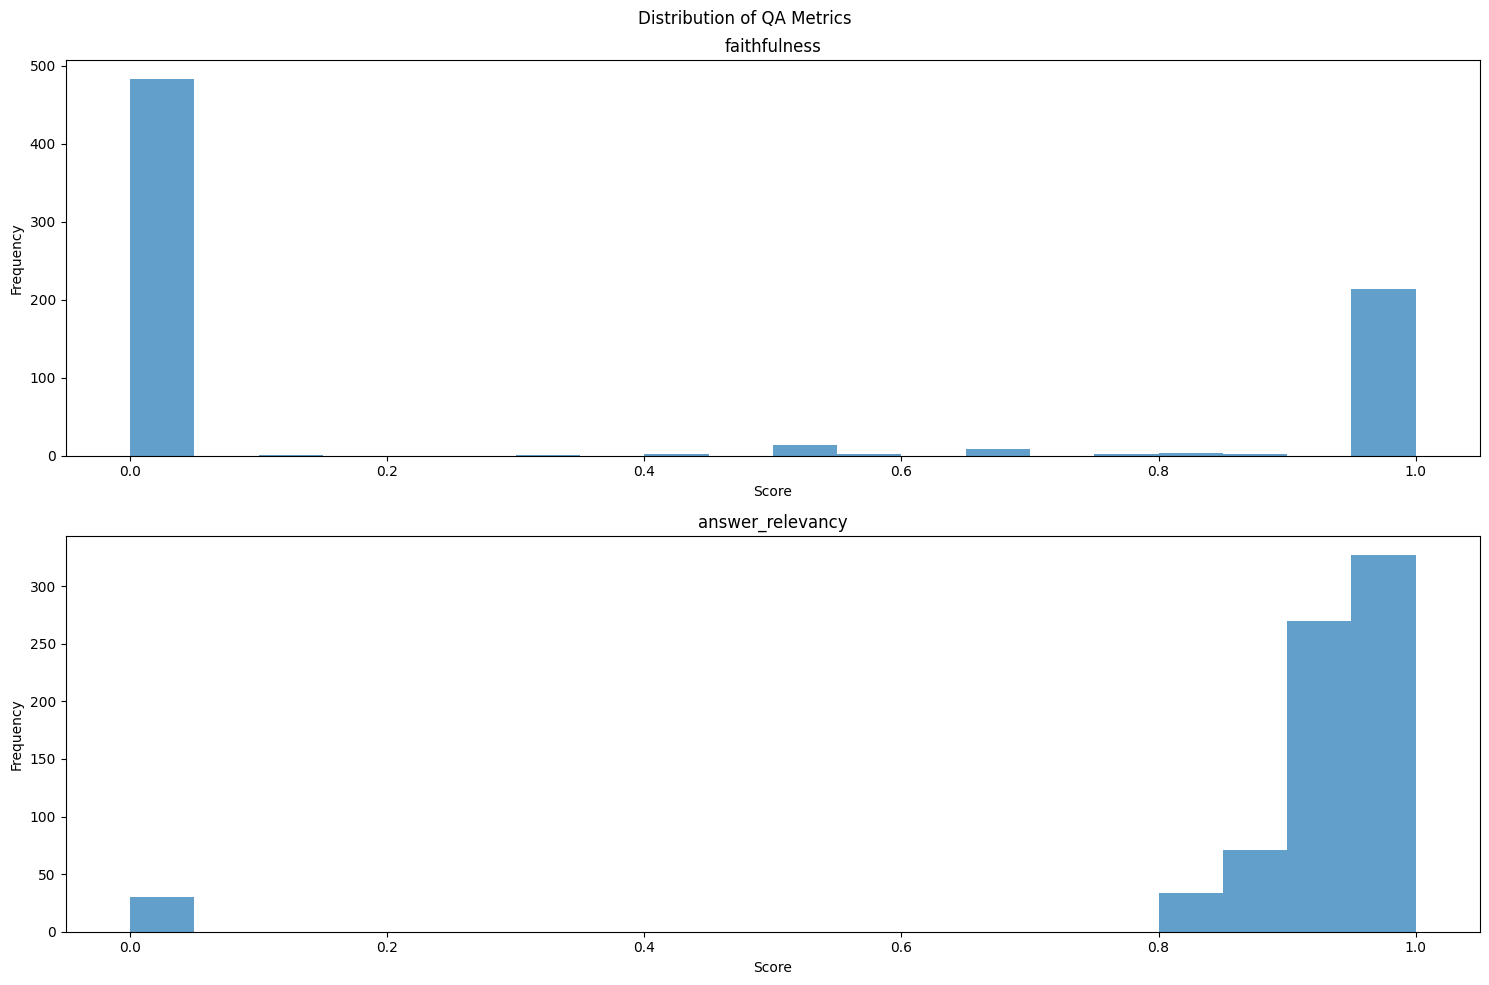

In [7]:
# plot histograms for each metric
def plot_metrics(metrics, title):
    plt.figure(figsize=(15, 10))
    for i, name in enumerate(metric_names):
        plt.subplot(2, 1, i + 1)
        plt.hist(metrics[name], bins=20, alpha=0.7)
        # if name == 'answer_relevancy':
        #     plt.axvline(x=0.7, color='r', linestyle='--', label='Threshold (0.7)')
        # elif name == 'context_precision':
        #     plt.axvline(x=0.65, color='r', linestyle='--', label='Threshold (0.65)')
        # else:
        #     plt.axvline(x=0.9, color='r', linestyle='--', label='Threshold (0.9)')
        plt.title(name)
        plt.xlabel('Score')
        plt.ylabel('Frequency')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    # save the plot
    #plt.savefig(f"{title.replace(' ', '_').lower()}.png")
    
plot_metrics(metrics_filtered, "Distribution of QA Metrics")

In [11]:
# load QA paris with faithfulness < 0.1
def filter_low_faithfulness(qa_data, threshold=0.1):
    return [qa for qa in qa_data if qa['metrics']['faithfulness'] < threshold]

low_faithfulness_qa = filter_low_faithfulness(filtered_qa + rejected_qa)

# print 20 examples
for qa in low_faithfulness_qa[:20]:
    print(f"Question: {qa['question']}")
    print(f"Answer: {qa['answer']}")
    print(f"Context: {qa['reference']['chunk_text']}")
    print(f"Metrics: {qa['metrics']}")
    print("-" * 80)

Question: What type of financial instrument is being issued by Deutsche Pfandbriefbank AG, and what is the initial issuance price?
Answer: The financial instrument being issued is EUR 259,500,000 Zero Coupon Notes, and the initial issuance price is 38.53205573%.
Context: n nicht etwas anderes bestimmen, die gleiche Bedeutung, wenn sie in diesen Endgültigen Bedingungen verwendet werden.

The Terms and Conditions shall be completed and specified by the information contained in Part I of these Final Terms. Terms and Conditions of the Notes as set out in Part I of these Final Termsrepresent the conditions applicable to the relevant Series of Notes (the ' Conditions '). If and to the extent the Conditions deviate from the Terms and Conditions, the Conditions shall prevail. If and to the extent the Conditions deviate from other terms contained in this document, the Conditions shall prevail.

Die Emissionsbedingungen werden durch die Angaben in Teil I dieser Endgültigen Bedingungen vervollstä